
# Applied Data Science Capstone Week 3

## Introduction

In this lab, you will learn in details how to make scraping with the most important python library <a href="#item1">BeautifulSoup</a> . You will learn how with a URL ,you can import, clean and structured data in a adequat format. You will also learn how to use python library  <a href="#item1">geocoder</a>  by sending a request to the API to search for a specific type of venues, to explore a particular venue, to explore a geographical location, and to get trending venues around a location. Also, you will learn how to use the visualization library, Folium, to visualize the results.
- Learn about clustering and k-means clustering in particular.
- Learn how to use the Foursquare API and clustering to segment and cluster the neighborhoods in the city of Toronto.
- Learn how to use the Beautifulsoup Python package to scrape websites and parse HTML code.
- Learn how to use the visualization library, Folium, to visualize the results.

### Import necessary Libraries
##### Attention: geocoder  and Folium installation takes few minutes

In [1]:
import numpy as np 
import pandas as pd 
import bs4 as bs
import requests
import urllib.request
#!conda install -c conda-forge geocoder --yes # install geocoder packages 
import geocoder
import matplotlib.pyplot as plt # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors
# backend for rendering plots within the browser
%matplotlib inline 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
print('Folium and geocoder installed')
print('Libraries imported.')

C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Folium and geocoder installed
Libraries imported.


# Part I : Use python package <a href="#item1">BeautifulSoup</a>  to scrap list of postal codes of Canada


##### Create funtion to scrap and  import all table data text

In [2]:
def data_url_scrapping(url,scrap="table", attrs={"class": "wikitable sortable"}):
    """ 
    this function helps you to scrap your url with BeautifulSoup with some parameters.
    Please Ajust scrap and attrs parameters on your url
    Parameters:
      url : url you want to scrap
      scrap : "table" 
      attrs : attributs of the table
    """
    req = urllib.request.Request(url)
    page = urllib.request.urlopen(req)
    soup = bs.BeautifulSoup(page, "html")
    data_table = soup.find(scrap, attrs)
    trs = data_table.find_all('tr')
    rows = []
    def get_data_table_row_and_header(tr, coltag='td'): # td (data) or th (header)  
        """
        this function helps you to get row of your data table that you parse.
        Parses a html segment started with tag <table> followed by multiple <tr> (table rows) and inner <td> (table data) tags. 
        It returns a list of rows with inner columns. Accepts only one <th> (table header/data) in the first row.
        Parameters:
          tr = data table scrap
          coltag :  can be 'th' for table header tag, "td" for table data tag
        """
        return [td.get_text(strip=True) for td in tr.find_all(coltag)]
    headerow = get_data_table_row_and_header(trs[0], 'th')
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append(get_data_table_row_and_header(tr, 'td') ) # data row       
    return(rows)

###### Data  preprocessing

In [3]:
data = data_url_scrapping('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M',scrap="table", attrs={"class": "wikitable sortable"})
data = pd.DataFrame(data[1:], columns=data[0])
data = data[data.Borough!="Not assigned"].reset_index(drop=True)
print("List of postal codes of Canada scrapping and preprocessing done !! ")
data.head()

List of postal codes of Canada scrapping and preprocessing done !! 


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


#### Use the df.shape method to print the number of rows of your dataframe

In [4]:
for i in range(2):
    print("List of postal codes of Canada has : " + str(data.shape[0]) +" rows")

List of postal codes of Canada has : 103 rows
List of postal codes of Canada has : 103 rows


# Part II : Use python package <a href="#item1">geocode</a> or the link  to get geographical coordinates


### Method 1 : Use  <a href="#item1">Geocode</a>  python  library to get  geographical coordinates
###  !!! This method  don't work well so go directly on  <a href="#item1">Method 2</a>

In [5]:
#import geocoder 
# initialize your variable to None
#lat_lng_coords = None
# loop until you get the coordinates
#postal_code = "M5G"
#while(lat_lng_coords is None):
#  g = geocoder.google('{}, Downtown Toronto'.format(postal_code))
#  lat_lng_coords = g.latlng
#print(lat_lng_coords)
#latitude = lat_lng_coords[0]
#longitude = lat_lng_coords[1]


### Method 2 : Use the link http://cocl.us/Geospatial_data to download geographical coordinates directly
###### after download  you merge an clean data set  with postal codes of Canada data

In [6]:
#!wget -q -O 'Geospatial_Coordinates.csv' https://cocl.us/Geospatial_data
print('Data downloaded!')
print("\n")
Geospatial_Coordinates = pd.read_csv('https://cocl.us/Geospatial_data/Geospatial_Coordinates.csv')
Geospatial_Coordinates.head()
data_final = data.merge(Geospatial_Coordinates)
print(data_final[["Postal Code","Latitude", "Longitude"]].head())
print("\n")
print("#"*50)
print("    To make sure that data set has not null values")
print("#"*50)
print("\n")
print(data_final.isnull().sum())

Data downloaded!


  Postal Code   Latitude  Longitude
0         M3A  43.753259 -79.329656
1         M4A  43.725882 -79.315572
2         M5A  43.654260 -79.360636
3         M6A  43.718518 -79.464763
4         M7A  43.662301 -79.389494


##################################################
    To make sure that data set has not null values
##################################################


Postal Code     0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64


# Part III : Use python package  <a href="#item1">folium</a> to create map of Toronto with neighborhoods and clusterize them

###  I :  Maps of Toronto with neighborhoods

#### Use geopy library to get the latitude and longitude values of Toronto City .

In [7]:
address = 'Toronto, CA'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6534817, -79.3839347.


#### Select and create a map of Toronto with neighborhoods superimposed on top.

for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Toronto. So let's slice the original dataframe and create a new dataframe of the Toronto data

In [8]:
data_Toronto = data_final[data_final.Borough=="Downtown Toronto"].reset_index(drop=True)
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(data_Toronto['Latitude'], data_Toronto['Longitude'], data_Toronto['Borough'], data_Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    


### Because I have difficults to add maps to the jupyter notebook , please for seeing this map card you have 2 options:
#### 1 : please download this html :
https://github.com/iamadouhassane/Coursera_ML_Capstone_week_3/blob/master/Toronto_Neighborhoods_map.html


#### 2 :  load the file on :
https://github.com/iamadouhassane/Coursera_ML_Capstone_week_3/blob/master/Toronto_Neighborhoods_map.PNG

In [9]:
#map_Toronto.save('C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_3/Toronto_Neighborhoods_map.html')
map_Toronto

#### Explore Neighborhoods in Toronto by using Foursquare API

In [10]:
#### Define Foursquare Credentials and Version
#### PLease Enter your CLIENT_ID and CLIENT_SECRET of Foursquare account

CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT= 100


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Let's apply the function to explore the venue in Toronto

In [12]:
data_Toronto_venues = getNearbyVenues(names=data_Toronto['Neighborhood'],latitudes=data_Toronto['Latitude'],longitudes=data_Toronto['Longitude'])

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


##### Let's check how many venues were returned for each neighborhood and how many unique categories can be curated from all the returned venues

In [13]:
print("#"*80)
print('                    {} venues were returned by Foursquare API.'.format(data_Toronto_venues.shape[0]))
print("#"*80)
print("\n")
print("#"*80)
print('                    There are {} uniques categories.'.format(len(data_Toronto_venues['Venue Category'].unique())))
print("#"*80)
print("\n")
print("                    number of venues for each Neighborhood  ")
print("#"*80)
print(data_Toronto_venues.groupby('Neighborhood')["Venue Category"].count().reset_index().rename(columns={"Venue Category":"number of venues"}))
print("#"*80)
print("\n")
print("                    data_Toronto_venues head   ")
print("#"*120)
data_Toronto_venues.head()

################################################################################
                    1220 venues were returned by Foursquare API.
################################################################################


################################################################################
                    There are 212 uniques categories.
################################################################################


                    number of venues for each Neighborhood  
################################################################################
                                         Neighborhood  number of venues
0                                         Berczy Park                55
1   CN Tower, King and Spadina, Railway Lands, Har...                16
2                                  Central Bay Street                66
3                                            Christie                17
4                                Church and Wellesl

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


###  II: Analyze Each Neighborhood

In [14]:
# one hot encoding
data_Toronto_onehot = pd.get_dummies(data_Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
data_Toronto_onehot['Neighborhood'] = data_Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [data_Toronto_onehot.columns[-1]] + list(data_Toronto_onehot.columns[:-1])
data_Toronto_onehot = data_Toronto_onehot[fixed_columns]
print('The new dataframe size are: {} '.format(data_Toronto_onehot.shape))
print("\n")
data_Toronto_onehot.head()

The new dataframe size are: (1220, 212) 




,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [15]:
data_Toronto_grouped = data_Toronto_onehot.groupby('Neighborhood').mean().reset_index()
print('The new dataframe size are: {} '.format(data_Toronto_grouped.shape))
print("\n")
data_Toronto_grouped.head()

The new dataframe size are: (19, 212) 




,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.000000,0.0,0.0,0.018182,0.0,0.000000,0.0,0.0,0.000000,0.0
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0,0.000000,0.0625,0.0625,0.0625,0.125,0.125,0.125,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,Central Bay Street,0.015152,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.000000,0.0,0.0,0.015152,0.0,0.015152,0.0,0.0,0.000000,0.0
3,Christie,0.000000,0.0,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,Church and Wellesley,0.026316,0.0,0.013158,0.0000,0.0000,0.0000,0.000,0.000,0.000,...,0.013158,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.013158,0.0


#### Let's print each neighborhood along with the top 5 most common venues

In [16]:
num_top_venues = 5

for hood in data_Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = data_Toronto_grouped[data_Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2              Bakery  0.04
3                Café  0.04
4  Seafood Restaurant  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0  Airport Terminal  0.12
1    Airport Lounge  0.12
2   Airport Service  0.12
3          Boutique  0.06
4  Sculpture Garden  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1  Italian Restaurant  0.06
2      Sandwich Place  0.05
3                Café  0.05
4     Bubble Tea Shop  0.03


----Christie----
           venue  freq
0  Grocery Store  0.24
1           Café  0.18
2           Park  0.12
3      Nightclub  0.06
4          Diner  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.07
1     Sushi Restaurant  0.07
2  Japanese Restaurant  0.07
3           Restaurant  0.04
4        

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [18]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = data_Toronto_grouped['Neighborhood']

for ind in np.arange(data_Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data_Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Bakery,Seafood Restaurant,Cheese Shop,Restaurant,Café,Diner,Beach
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Terminal,Airport Service,Sculpture Garden,Plane,Boutique,Harbor / Marina,Coffee Shop,Airport Gate,Airport Food Court
2,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Burger Joint,Bar,Middle Eastern Restaurant,Japanese Restaurant,Ice Cream Shop,Restaurant
3,Christie,Grocery Store,Café,Park,Diner,Baby Store,Restaurant,Candy Store,Italian Restaurant,Athletics & Sports,Nightclub
4,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Coffee Shop,Restaurant,Gay Bar,Yoga Studio,Café,Men's Store,Mediterranean Restaurant,Hotel


###  III: Cluster Neighborhoods and maps them


Run *k*-means to cluster the neighborhood into k clusters.
First, let's determine a optimal number of clusters

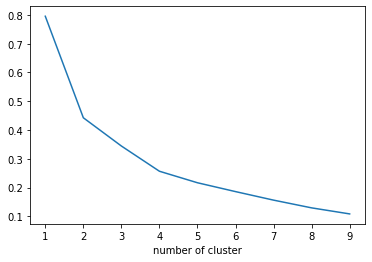

In [19]:
sse = {}
data_Toronto_grouped_without_Neighborhood = data_Toronto_grouped.drop('Neighborhood', 1)
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_Toronto_grouped_without_Neighborhood)
    data_Toronto_grouped['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("number of cluster")
plt.show()


As you see number of clusters = 6

In [20]:
# set number of clusters
kclusters = 6
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_Toronto_grouped_without_Neighborhood)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 2, 1, 1, 1, 1, 1, 4])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [21]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
data_Toronto_merged = data_Toronto
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
data_Toronto_merged = data_Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
data_Toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,5,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Theater,Yoga Studio,Dessert Shop,Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,5,Coffee Shop,Sushi Restaurant,Gym,Creperie,Park,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Hobby Shop,Wings Joint
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Bubble Tea Shop,Japanese Restaurant,Middle Eastern Restaurant,Cosmetics Shop,Italian Restaurant,Restaurant,Café,Diner
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Italian Restaurant,Department Store,Lingerie Store,Creperie,Cosmetics Shop
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Beer Bar,Bakery,Seafood Restaurant,Cheese Shop,Restaurant,Café,Diner,Beach


Finally, let's visualize the resulting clusters

In [22]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_Toronto_merged['Latitude'], data_Toronto_merged['Longitude'], data_Toronto_merged['Neighborhood'], data_Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       


### Because I have difficults to add maps to the jupyter notebook , please for seeing this map card you have 2 options:
#### 1 : please download this html :
https://github.com/iamadouhassane/Coursera_ML_Capstone_week_3/blob/master/Toronto_Neighborhoods_Cluster_map.html


#### 2 :  load the file on :
https://github.com/iamadouhassane/Coursera_ML_Capstone_week_3/blob/master/Toronto_Neighborhoods_Cluster_map.PNG

In [23]:
#map_clusters.save('C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_3/Toronto_Neighborhoods_Cluster_map.html')
map_clusters


### Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

##### Cluster 1

In [24]:
data_Toronto_merged.loc[data_Toronto_merged['Cluster Labels'] == 0, data_Toronto_merged.columns[[1] + list(range(5, data_Toronto_merged.shape[1]))]].head()

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown Toronto,0,Airport Lounge,Airport Terminal,Airport Service,Sculpture Garden,Plane,Boutique,Harbor / Marina,Coffee Shop,Airport Gate,Airport Food Court


##### Cluster 2

In [25]:
data_Toronto_merged.loc[data_Toronto_merged['Cluster Labels'] == 1, data_Toronto_merged.columns[[1] + list(range(5, data_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,1,Clothing Store,Coffee Shop,Bubble Tea Shop,Japanese Restaurant,Middle Eastern Restaurant,Cosmetics Shop,Italian Restaurant,Restaurant,Café,Diner
3,Downtown Toronto,1,Coffee Shop,Café,Cocktail Bar,Gastropub,American Restaurant,Italian Restaurant,Department Store,Lingerie Store,Creperie,Cosmetics Shop
4,Downtown Toronto,1,Coffee Shop,Cocktail Bar,Beer Bar,Bakery,Seafood Restaurant,Cheese Shop,Restaurant,Café,Diner,Beach
5,Downtown Toronto,1,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Burger Joint,Bar,Middle Eastern Restaurant,Japanese Restaurant,Ice Cream Shop,Restaurant
7,Downtown Toronto,1,Coffee Shop,Café,Restaurant,Gym,Deli / Bodega,Thai Restaurant,Clothing Store,Hotel,Pizza Place,Cosmetics Shop
8,Downtown Toronto,1,Coffee Shop,Aquarium,Café,Hotel,Scenic Lookout,Sporting Goods Shop,Brewery,Restaurant,Fried Chicken Joint,Italian Restaurant
9,Downtown Toronto,1,Coffee Shop,Hotel,Café,Restaurant,Japanese Restaurant,Salad Place,Italian Restaurant,American Restaurant,Seafood Restaurant,Deli / Bodega
10,Downtown Toronto,1,Coffee Shop,Café,Restaurant,Hotel,American Restaurant,Gym,Japanese Restaurant,Deli / Bodega,Seafood Restaurant,Italian Restaurant
15,Downtown Toronto,1,Coffee Shop,Café,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Cocktail Bar,Restaurant,Beer Bar,Breakfast Spot,Hotel
16,Downtown Toronto,1,Restaurant,Coffee Shop,Pizza Place,Park,Bakery,Pub,Italian Restaurant,Café,Butcher,Snack Place


##### Cluster 3

In [26]:
data_Toronto_merged.loc[data_Toronto_merged['Cluster Labels'] == 2, data_Toronto_merged.columns[[1] + list(range(5, data_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Downtown Toronto,2,Grocery Store,Café,Park,Diner,Baby Store,Restaurant,Candy Store,Italian Restaurant,Athletics & Sports,Nightclub



##### Cluster 4

In [27]:
data_Toronto_merged.loc[data_Toronto_merged['Cluster Labels'] == 3, data_Toronto_merged.columns[[1] + list(range(5, data_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,3,Park,Playground,Trail,Creperie,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop


##### Cluster 5

In [28]:
data_Toronto_merged.loc[data_Toronto_merged['Cluster Labels'] == 4, data_Toronto_merged.columns[[1] + list(range(5, data_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Downtown Toronto,4,Café,Restaurant,Bar,Italian Restaurant,Japanese Restaurant,Bookstore,Bakery,Yoga Studio,Beer Store,Sandwich Place
12,Downtown Toronto,4,Café,Mexican Restaurant,Coffee Shop,Bakery,Vietnamese Restaurant,Bar,Dessert Shop,Vegetarian / Vegan Restaurant,Gaming Cafe,Burger Joint


##### Cluster 6

In [29]:
data_Toronto_merged.loc[data_Toronto_merged['Cluster Labels'] == 5, data_Toronto_merged.columns[[1] + list(range(5, data_Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,5,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Café,Theater,Yoga Studio,Dessert Shop,Restaurant
1,Downtown Toronto,5,Coffee Shop,Sushi Restaurant,Gym,Creperie,Park,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Hobby Shop,Wings Joint
